# Monthly car sales in Quebec 

This data contains information about car sales within  the period of 1960-1968. The goal is to build a model that can predict monthly car sales for at least 1 subsequent year

##### Necessary libraries

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import warnings 
%cd pfda

(bookmark:pfda) -> C:\Users\User\Desktop\Python for data analyses
C:\Users\User\Desktop\Python for data analyses


##### Reading the csv file from default folder

In [2]:
sales=pd.read_csv('monthly-car-sales-in-quebec-1960.csv',delimiter=';')
sales

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


##### Plotting data

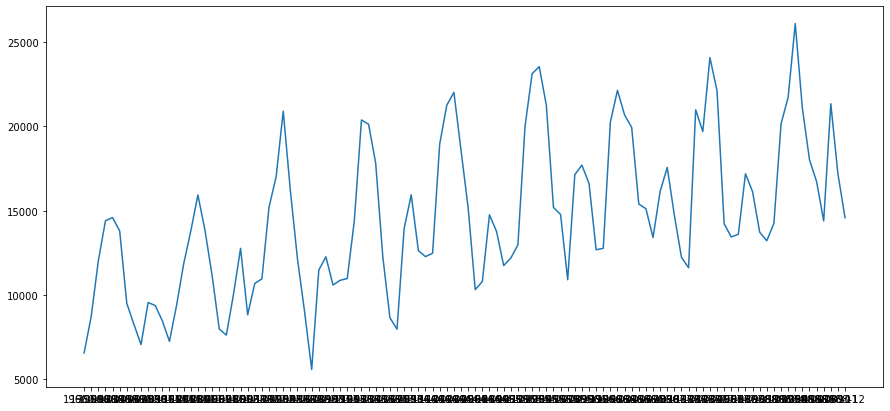

In [3]:
plt.figure(figsize=(15,7))
plt.plot(sales.Month,sales.iloc[:,1])

##### Data recofiguration for Neural Network

In [4]:
sales_nn=DataFrame()
for i in range(1,13):
    sales_nn['t_'+str(i)]=sales.iloc[:,1][(i-1):(97+i-1)].values  

In [5]:
sales_nn

,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,t_11,t_12
0,6550,8728,12026,14395,14587,13791,9498,8251,7049,9545,9364,8456
1,8728,12026,14395,14587,13791,9498,8251,7049,9545,9364,8456,7237
2,12026,14395,14587,13791,9498,8251,7049,9545,9364,8456,7237,9374
3,14395,14587,13791,9498,8251,7049,9545,9364,8456,7237,9374,11837
4,14587,13791,9498,8251,7049,9545,9364,8456,7237,9374,11837,13784
...,...,...,...,...,...,...,...,...,...,...,...,...
92,13598,17187,16119,13713,13210,14251,20139,21725,26099,21084,18024,16722
93,17187,16119,13713,13210,14251,20139,21725,26099,21084,18024,16722,14385
94,16119,13713,13210,14251,20139,21725,26099,21084,18024,16722,14385,21342
95,13713,13210,14251,20139,21725,26099,21084,18024,16722,14385,21342,17180


In [6]:
sales_nn['t_13']=np.hstack((sales.iloc[:,1][12:].values,(np.nan)))
sales_nn=sales_nn[:-1]
sales_nn

,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,t_11,t_12,t_13
0,6550,8728,12026,14395,14587,13791,9498,8251,7049,9545,9364,8456,7237.0
1,8728,12026,14395,14587,13791,9498,8251,7049,9545,9364,8456,7237,9374.0
2,12026,14395,14587,13791,9498,8251,7049,9545,9364,8456,7237,9374,11837.0
3,14395,14587,13791,9498,8251,7049,9545,9364,8456,7237,9374,11837,13784.0
4,14587,13791,9498,8251,7049,9545,9364,8456,7237,9374,11837,13784,15926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,13434,13598,17187,16119,13713,13210,14251,20139,21725,26099,21084,18024,16722.0
92,13598,17187,16119,13713,13210,14251,20139,21725,26099,21084,18024,16722,14385.0
93,17187,16119,13713,13210,14251,20139,21725,26099,21084,18024,16722,14385,21342.0
94,16119,13713,13210,14251,20139,21725,26099,21084,18024,16722,14385,21342,17180.0


##### Splitting data in train and test

In [8]:
x=sales_nn.drop('t_13',axis=1)
y=sales_nn['t_13']
x_train=x[:91]
y_train=y[:91]
x_test=x[91:]
y_test=y[91:]
x_train=x_train.values
x_test=x_test.values
y_train=y_train.values
y_test=y_test.values

##### Training Neural Network

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
tf.random.set_seed(42)
init1=keras.initializers.TruncatedNormal(mean=0,stddev=0.05)
init2=keras.initializers.Constant(0)
model=Sequential()
model.add(Dense(8,input_dim=12,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])
history=model.fit(x_train,y_train,epochs=700,verbose=2)

Epoch 1/700
3/3 - 1s - loss: 229653440.0000 - mean_absolute_percentage_error: 105.7172
Epoch 2/700
3/3 - 0s - loss: 199445184.0000 - mean_absolute_percentage_error: 98.0725
Epoch 3/700
3/3 - 0s - loss: 172264736.0000 - mean_absolute_percentage_error: 90.6245
Epoch 4/700
3/3 - 0s - loss: 147920816.0000 - mean_absolute_percentage_error: 84.2499
Epoch 5/700
3/3 - 0s - loss: 127262696.0000 - mean_absolute_percentage_error: 77.9251
Epoch 6/700
3/3 - 0s - loss: 109444568.0000 - mean_absolute_percentage_error: 72.2351
Epoch 7/700
3/3 - 0s - loss: 94752320.0000 - mean_absolute_percentage_error: 67.1771
Epoch 8/700
3/3 - 0s - loss: 81736864.0000 - mean_absolute_percentage_error: 62.6914
Epoch 9/700
3/3 - 0s - loss: 71148080.0000 - mean_absolute_percentage_error: 58.7010
Epoch 10/700
3/3 - 0s - loss: 62469120.0000 - mean_absolute_percentage_error: 55.2910
Epoch 11/700
3/3 - 0s - loss: 56176068.0000 - mean_absolute_percentage_error: 52.5855
Epoch 12/700
3/3 - 0s - loss: 50698872.0000 - mean_absol

Epoch 97/700
3/3 - 0s - loss: 15653386.0000 - mean_absolute_percentage_error: 23.8979
Epoch 98/700
3/3 - 0s - loss: 15540107.0000 - mean_absolute_percentage_error: 23.8063
Epoch 99/700
3/3 - 0s - loss: 15413721.0000 - mean_absolute_percentage_error: 23.6949
Epoch 100/700
3/3 - 0s - loss: 15291479.0000 - mean_absolute_percentage_error: 23.5864
Epoch 101/700
3/3 - 0s - loss: 15162753.0000 - mean_absolute_percentage_error: 23.4784
Epoch 102/700
3/3 - 0s - loss: 15048736.0000 - mean_absolute_percentage_error: 23.3957
Epoch 103/700
3/3 - 0s - loss: 14928316.0000 - mean_absolute_percentage_error: 23.3097
Epoch 104/700
3/3 - 0s - loss: 14809870.0000 - mean_absolute_percentage_error: 23.2139
Epoch 105/700
3/3 - 0s - loss: 14690381.0000 - mean_absolute_percentage_error: 23.1291
Epoch 106/700
3/3 - 0s - loss: 14579619.0000 - mean_absolute_percentage_error: 23.0473
Epoch 107/700
3/3 - 0s - loss: 14448452.0000 - mean_absolute_percentage_error: 22.9508
Epoch 108/700
3/3 - 0s - loss: 14329067.0000 -

Epoch 192/700
3/3 - 0s - loss: 6663740.5000 - mean_absolute_percentage_error: 15.1742
Epoch 193/700
3/3 - 0s - loss: 6623271.5000 - mean_absolute_percentage_error: 15.1277
Epoch 194/700
3/3 - 0s - loss: 6583773.0000 - mean_absolute_percentage_error: 15.0739
Epoch 195/700
3/3 - 0s - loss: 6545375.0000 - mean_absolute_percentage_error: 15.0309
Epoch 196/700
3/3 - 0s - loss: 6509129.0000 - mean_absolute_percentage_error: 14.9956
Epoch 197/700
3/3 - 0s - loss: 6468445.5000 - mean_absolute_percentage_error: 14.9501
Epoch 198/700
3/3 - 0s - loss: 6431945.0000 - mean_absolute_percentage_error: 14.9038
Epoch 199/700
3/3 - 0s - loss: 6400517.0000 - mean_absolute_percentage_error: 14.8672
Epoch 200/700
3/3 - 0s - loss: 6360641.5000 - mean_absolute_percentage_error: 14.8196
Epoch 201/700
3/3 - 0s - loss: 6327981.5000 - mean_absolute_percentage_error: 14.7659
Epoch 202/700
3/3 - 0s - loss: 6293188.0000 - mean_absolute_percentage_error: 14.7174
Epoch 203/700
3/3 - 0s - loss: 6257231.0000 - mean_abs

Epoch 288/700
3/3 - 0s - loss: 4792956.0000 - mean_absolute_percentage_error: 12.6802
Epoch 289/700
3/3 - 0s - loss: 4782718.0000 - mean_absolute_percentage_error: 12.6629
Epoch 290/700
3/3 - 0s - loss: 4766983.5000 - mean_absolute_percentage_error: 12.6418
Epoch 291/700
3/3 - 0s - loss: 4755915.5000 - mean_absolute_percentage_error: 12.6233
Epoch 292/700
3/3 - 0s - loss: 4745704.5000 - mean_absolute_percentage_error: 12.6131
Epoch 293/700
3/3 - 0s - loss: 4732201.0000 - mean_absolute_percentage_error: 12.5957
Epoch 294/700
3/3 - 0s - loss: 4722868.5000 - mean_absolute_percentage_error: 12.5798
Epoch 295/700
3/3 - 0s - loss: 4710703.5000 - mean_absolute_percentage_error: 12.5621
Epoch 296/700
3/3 - 0s - loss: 4700762.0000 - mean_absolute_percentage_error: 12.5480
Epoch 297/700
3/3 - 0s - loss: 4690147.0000 - mean_absolute_percentage_error: 12.5337
Epoch 298/700
3/3 - 0s - loss: 4680614.5000 - mean_absolute_percentage_error: 12.5229
Epoch 299/700
3/3 - 0s - loss: 4669949.5000 - mean_abs

Epoch 384/700
3/3 - 0s - loss: 3917235.7500 - mean_absolute_percentage_error: 11.3801
Epoch 385/700
3/3 - 0s - loss: 3909620.7500 - mean_absolute_percentage_error: 11.3646
Epoch 386/700
3/3 - 0s - loss: 3901766.2500 - mean_absolute_percentage_error: 11.3517
Epoch 387/700
3/3 - 0s - loss: 3895453.5000 - mean_absolute_percentage_error: 11.3394
Epoch 388/700
3/3 - 0s - loss: 3889012.0000 - mean_absolute_percentage_error: 11.3255
Epoch 389/700
3/3 - 0s - loss: 3882202.2500 - mean_absolute_percentage_error: 11.3167
Epoch 390/700
3/3 - 0s - loss: 3874379.2500 - mean_absolute_percentage_error: 11.3069
Epoch 391/700
3/3 - 0s - loss: 3866165.5000 - mean_absolute_percentage_error: 11.2940
Epoch 392/700
3/3 - 0s - loss: 3860543.0000 - mean_absolute_percentage_error: 11.2833
Epoch 393/700
3/3 - 0s - loss: 3852835.5000 - mean_absolute_percentage_error: 11.2705
Epoch 394/700
3/3 - 0s - loss: 3847000.0000 - mean_absolute_percentage_error: 11.2668
Epoch 395/700
3/3 - 0s - loss: 3840979.7500 - mean_abs

Epoch 480/700
3/3 - 0s - loss: 3382005.7500 - mean_absolute_percentage_error: 10.4376
Epoch 481/700
3/3 - 0s - loss: 3378362.0000 - mean_absolute_percentage_error: 10.4282
Epoch 482/700
3/3 - 0s - loss: 3372865.0000 - mean_absolute_percentage_error: 10.4144
Epoch 483/700
3/3 - 0s - loss: 3369025.5000 - mean_absolute_percentage_error: 10.4066
Epoch 484/700
3/3 - 0s - loss: 3365597.2500 - mean_absolute_percentage_error: 10.4018
Epoch 485/700
3/3 - 0s - loss: 3360724.0000 - mean_absolute_percentage_error: 10.3964
Epoch 486/700
3/3 - 0s - loss: 3357243.7500 - mean_absolute_percentage_error: 10.3870
Epoch 487/700
3/3 - 0s - loss: 3352704.0000 - mean_absolute_percentage_error: 10.3781
Epoch 488/700
3/3 - 0s - loss: 3348386.0000 - mean_absolute_percentage_error: 10.3690
Epoch 489/700
3/3 - 0s - loss: 3347344.2500 - mean_absolute_percentage_error: 10.3677
Epoch 490/700
3/3 - 0s - loss: 3341999.7500 - mean_absolute_percentage_error: 10.3577
Epoch 491/700
3/3 - 0s - loss: 3338985.2500 - mean_abs

Epoch 576/700
3/3 - 0s - loss: 3100380.7500 - mean_absolute_percentage_error: 9.7803
Epoch 577/700
3/3 - 0s - loss: 3097845.0000 - mean_absolute_percentage_error: 9.7789
Epoch 578/700
3/3 - 0s - loss: 3096197.0000 - mean_absolute_percentage_error: 9.7772
Epoch 579/700
3/3 - 0s - loss: 3094070.2500 - mean_absolute_percentage_error: 9.7737
Epoch 580/700
3/3 - 0s - loss: 3092470.2500 - mean_absolute_percentage_error: 9.7664
Epoch 581/700
3/3 - 0s - loss: 3089913.2500 - mean_absolute_percentage_error: 9.7553
Epoch 582/700
3/3 - 0s - loss: 3088242.2500 - mean_absolute_percentage_error: 9.7473
Epoch 583/700
3/3 - 0s - loss: 3086601.5000 - mean_absolute_percentage_error: 9.7412
Epoch 584/700
3/3 - 0s - loss: 3090922.5000 - mean_absolute_percentage_error: 9.7521
Epoch 585/700
3/3 - 0s - loss: 3084568.0000 - mean_absolute_percentage_error: 9.7516
Epoch 586/700
3/3 - 0s - loss: 3081035.0000 - mean_absolute_percentage_error: 9.7339
Epoch 587/700
3/3 - 0s - loss: 3082496.0000 - mean_absolute_perce

Epoch 673/700
3/3 - 0s - loss: 2960948.7500 - mean_absolute_percentage_error: 9.4031
Epoch 674/700
3/3 - 0s - loss: 2961124.2500 - mean_absolute_percentage_error: 9.4164
Epoch 675/700
3/3 - 0s - loss: 2960287.0000 - mean_absolute_percentage_error: 9.4276
Epoch 676/700
3/3 - 0s - loss: 2958586.0000 - mean_absolute_percentage_error: 9.4271
Epoch 677/700
3/3 - 0s - loss: 2956559.7500 - mean_absolute_percentage_error: 9.4166
Epoch 678/700
3/3 - 0s - loss: 2957611.2500 - mean_absolute_percentage_error: 9.4050
Epoch 679/700
3/3 - 0s - loss: 2956587.0000 - mean_absolute_percentage_error: 9.3807
Epoch 680/700
3/3 - 0s - loss: 2954093.0000 - mean_absolute_percentage_error: 9.3666
Epoch 681/700
3/3 - 0s - loss: 2956472.2500 - mean_absolute_percentage_error: 9.3709
Epoch 682/700
3/3 - 0s - loss: 2953729.7500 - mean_absolute_percentage_error: 9.3650
Epoch 683/700
3/3 - 0s - loss: 2951716.5000 - mean_absolute_percentage_error: 9.3610
Epoch 684/700
3/3 - 0s - loss: 2949869.7500 - mean_absolute_perce

##### Evaluating model

In [10]:
warnings.filterwarnings('ignore')
Series([model.evaluate(x_train,y_train)[1]]+[model.evaluate(x_test,y_test)[1]],index=['Train','Test'])

1/1 [==============================] - 0s 16ms/step - loss: 4470583.0000 - mean_absolute_percentage_error: 8.6965


Train    9.378402
Test     8.696464
dtype: float64

##### Predictions

In [11]:
predictions=model.predict(x_test)
predictions_train=model.predict(x_train)
predicted_data=DataFrame(np.vstack((sales.iloc[:,1][:12].values.reshape(-1,1),predictions_train,predictions)))
predicted_data

,0
0,6550.000000
1,8728.000000
2,12026.000000
3,14395.000000
4,14587.000000
...,...
103,15813.322266
104,16414.294922
105,17246.019531
106,17974.863281


##### Plotting initial and predicted datasets

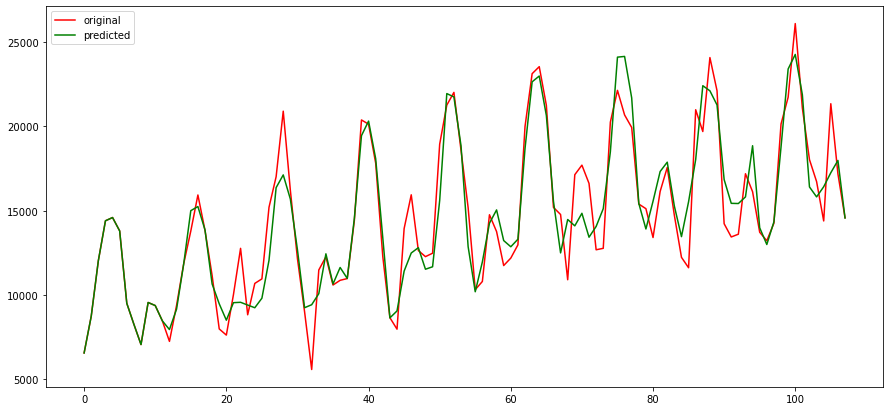

In [13]:
plt.figure(figsize=(15,7))
plt.plot(predicted_data.index,sales.iloc[:,1],'r',predicted_data.index,predicted_data.values,'g')
plt.legend(['original','predicted'])

##### Predictions for the subsequent months

In [14]:
new=[]
for i in range(12):
    pred_sale=model.predict(sales.iloc[:,1][(96+i):(108+i)].values.reshape(1,12))
    new_df=DataFrame({'Month':[str(i+1)],'Monthly car sales in Quebec 1960-1968':[pred_sale[0,0]]})
    sales=pd.concat([sales,new_df])
    new=new+[pred_sale[0,0]]

##### Concatenating all the parts of dataset

In [16]:
predicted_entire=DataFrame(np.vstack((sales.iloc[:,1][:12].values.reshape(-1,1),predictions_train,predictions,np.array(new).reshape(-1,1))))
predicted_entire

,0
0,6550.000000
1,8728.000000
2,12026.000000
3,14395.000000
4,14587.000000
...,...
115,17258.916016
116,19139.015625
117,20286.445312
118,18420.855469


##### Plotting with new predictions

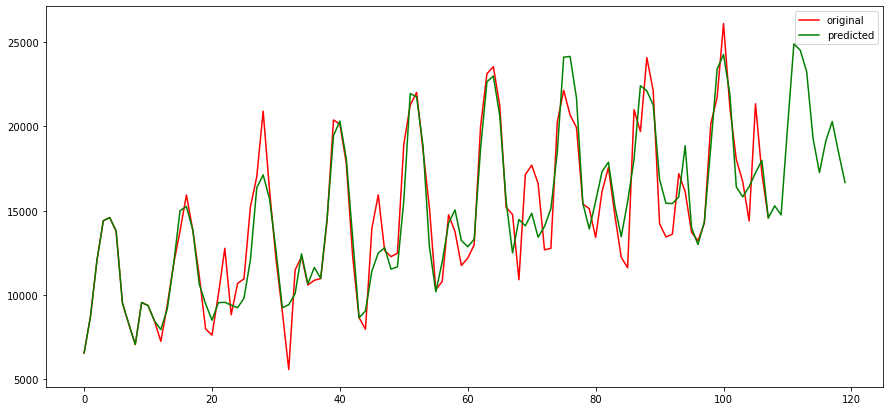

In [17]:
plt.figure(figsize=(15,7))
plt.plot(predicted_data.index,sales.iloc[:,1][:108],'r',predicted_entire.index,predicted_entire.values,'g')
plt.legend(['original','predicted'])